In [2]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import os

years = list(range(1473, 2021))
words = []
data_year = []
with gzip.open('C:/Users/bincl/BA-Thesis/Dataset/1gram/1_20000_nopos.gz','rt', encoding='utf-8') as input:
    for line in input:
        values = line.strip().split("\t")
        words.append(values[0]) 
        data = [entry.split(",") for entry in values[1:]]
        year = {entry[0]: entry[1] for entry in data}
        data_year.append(year)
        
df1gram = pd.DataFrame(index=words, columns= years)      
for i, word_data in enumerate(data_year):
    word = words[i]
    for year, value in word_data.items():
        df1gram.at[word, int(year)] = value  # Füge den Wert an der entsprechenden Position im DataFrame ein

# Fülle die NaN-Werte im DataFrame mit 0
df1gram.fillna(0, inplace=True)
print(df1gram) 



              1473  1474 1475  1476 1477  1478  1479  1480  1481  1482  ...  \
Empfehlungen     0     0    0     0    0     0     0     0     0     0  ...   
Fachbereich      0     0    0     0    0     0     0     0     0     0  ...   
Besprechungen    0     0    0     0    0     0     0     0     0     0  ...   
Berechtigung     0     0    0     0    0     0     0     0     0     0  ...   
Beiträgen        0     0    0     0    0     0     0     0     0     0  ...   
...            ...   ...  ...   ...  ...   ...   ...   ...   ...   ...  ...   
geistig          0     0    0     0    0     0     0     0     0     0  ...   
einsetzte        0     0    0     0    0     0     0     0     0     0  ...   
fasziniert       0     0    0     0    0     0     0     0     0     0  ...   
fährt            0     0    0     0    0     0     0     0     0     0  ...   
jeweiligen       0     0    2     0    0     0     0     0     0     0  ...   

                 2011    2012    2013    2014    20

In [3]:

print(df1gram.loc['einsetzte'])

1473        0
1474        0
1475        0
1476        0
1477        0
        ...  
2016    22031
2017    23065
2018    20782
2019    18304
2020        0
Name: einsetzte, Length: 548, dtype: object


In [4]:

with gzip.open('C:/Users/bincl/BA-Thesis/Dataset/2gram/2_20000_nopos_aa.gz','rt', encoding='utf-8') as input:
    for line in input:
        values = line.strip().split("\t")
        words.append(values[0]) 
        data = [entry.split(",") for entry in values[1:]]
        year = {entry[0]: entry[1] for entry in data}
        data_year.append(year)

        
df2gram = pd.DataFrame(index=words, columns= years)      
for i, word_data in enumerate(data_year):
    word = words[i]
    for year, value in word_data.items():
        df2gram.at[word, int(year)] = value  # Füge den Wert an der entsprechenden Position im DataFrame ein

# Fülle die NaN-Werte im DataFrame mit 0
df2gram.fillna(0, inplace=True)
print(df2gram)   

                          1473  1474 1475  1476 1477  1478  1479  1480  1481  \
Empfehlungen                 0     0    0     0    0     0     0     0     0   
Fachbereich                  0     0    0     0    0     0     0     0     0   
Besprechungen                0     0    0     0    0     0     0     0     0   
Berechtigung                 0     0    0     0    0     0     0     0     0   
Beiträgen                    0     0    0     0    0     0     0     0     0   
...                        ...   ...  ...   ...  ...   ...   ...   ...   ...   
Transformation vorwiegend    0     0    0     0    0     0     0     0     0   
Titel ihrer                  0     0    0     0    0     0     0     0     0   
Trotz Einwilligung           0     0    0     0    0     0     0     0     0   
Titel beurteilt              0     0    0     0    0     0     0     0     0   
Tode Julius                  0     0    0     0    0     0     0     0     0   

                           1482  ...   

<Axes: >

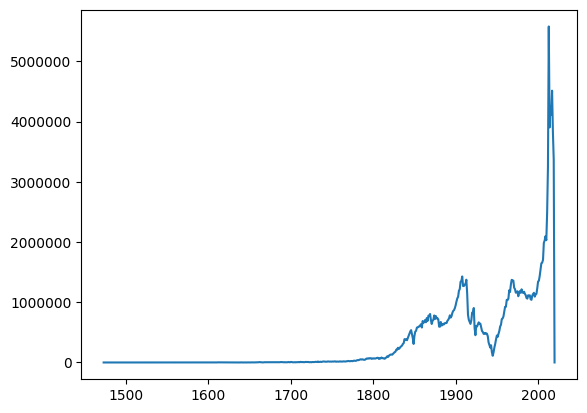

In [24]:
first5ones = df1gram.head()
first5twos = df1gram.head()

plt.ticklabel_format(style = 'plain')
func1 = df1gram.loc['ihrer']
func1=func1.astype(float)
func1.plot(x='year', y='times') 


<Axes: >

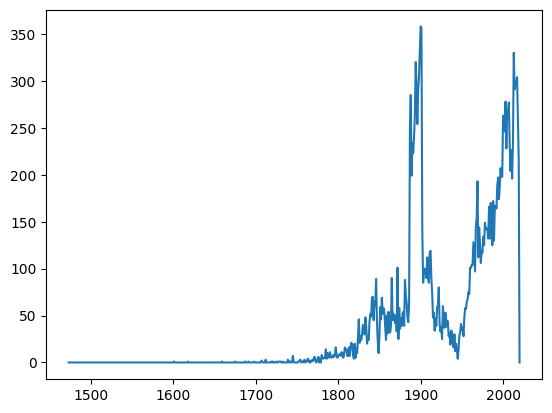

In [22]:
func2 = df2gram.loc['Titel ihrer']
func2=func2.astype(float)
func2.plot()

Remove first and last token of Time Series Gi and get the n-1 gram

In [6]:
def getLowerLevelString(string):
   first, *middle, last = string.split()
   return first,last

Calculate the RMSE error between two functions

In [109]:
from sklearn.metrics import mean_squared_error 

print(getLowerLevelString('Titel ihrer'))
real = func2
aprox = func1
rmse = mean_squared_error(real, aprox, squared = False)

print(rmse)


('Titel', 'ihrer')
732962.715299491


Linear Regression Testcase:

In [92]:
from sklearn.linear_model import LinearRegression 

def LR(token):
    first,last = getLowerLevelString(token)
    X = pd.concat([df1gram.loc[first],df1gram.loc[last]],axis=1)
    y = df2gram.loc[token]
    reg = LinearRegression()
    reg.fit(X, y) 
    print(reg.coef_) 
    return reg.coef_,X

Prints coefficients

In [98]:
coef,dfAprox = LR('Titel ihrer')
c1,c2 = coef

[9.33892013e-04 2.28045243e-06]


In [94]:
def scale(row):
    return ( c1 * float(row['first'])) + ( c2 * float(row['last']))

def map(v1,v2):
    return c1 * v1 + c2 * v2

Plot new aproximation 

         Titel      ihrer       scaled  scaledFirst    scaledLast  \
1473       4.0        2.0     0.001868     0.001868  4.259393e-09   
1474       0.0        0.0     0.000000     0.000000  0.000000e+00   
1475       3.0        1.0     0.000934     0.000934  2.129696e-09   
1476       0.0        0.0     0.000000     0.000000  0.000000e+00   
1477       0.0        0.0     0.000000     0.000000  0.000000e+00   
...        ...        ...          ...          ...           ...   
2016  304632.0  4112385.0  3840.523505  3840.523505  8.758131e-03   
2017  302303.0  4513276.0  4214.912408  4214.912408  9.611907e-03   
2018  258344.0  3826698.0  3573.722698  3573.722698  8.149705e-03   
2019  222714.0  3366090.0  3143.564565  3143.564565  7.168749e-03   
2020       0.0        0.0     0.000000     0.000000  0.000000e+00   

      approximation  
1473       0.001868  
1474       0.000000  
1475       0.000934  
1476       0.000000  
1477       0.000000  
...             ...  
2016    3840.5322

<Axes: >

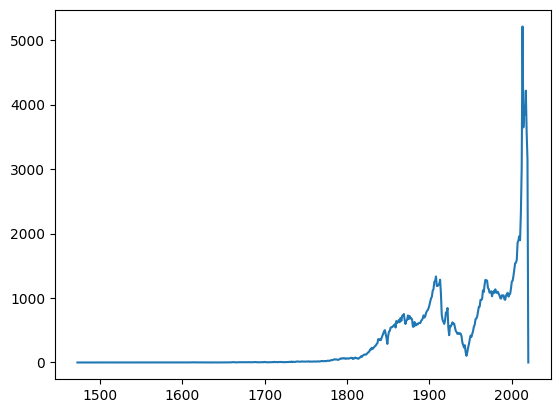

In [110]:
print(dfAprox)
#dfAprox.fillna(0)
dfAprox = dfAprox.astype('float')
#print(dfAprox.iloc[:,1])
#print(c1)
dfAprox['scaledFirst'] = dfAprox.iloc[:,1].apply(lambda x: x * c1) 
dfAprox['scaledLast'] = dfAprox.iloc[:,2].apply(lambda x: x * c2) 
dfAprox['approximation'] = dfAprox['scaledFirst'] + dfAprox['scaledLast']

print(dfAprox)
dfAprox['approximation'].plot()


<Axes: >

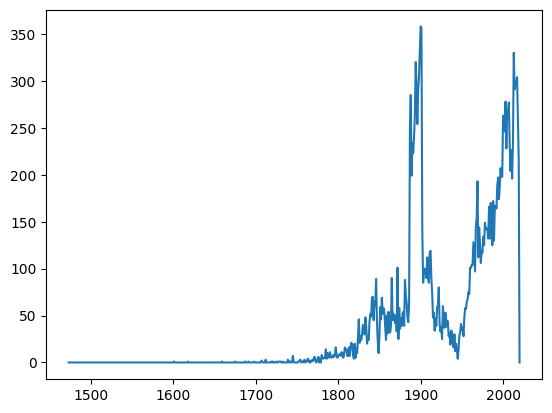

In [111]:
real.plot()

RMSE between Approximation and original

In [112]:
rmse = mean_squared_error(real, dfAprox['approximation'], squared = False)
print(rmse)

614.1410492909628


In [ ]:
arr = os.listdir('C:/Users/bincl/BA-Thesis/Dataset/2gram/')
for file in arr:
    with gzip.open('C:/Users/bincl/BA-Thesis/Dataset/2gram/' + file,'rt', encoding='utf-8') as input:
        for line in input:
            values = line.strip().split("\t")
            words.append(values[0]) 
            data = [entry.split(",") for entry in values[1:]]
            year = {entry[0]: entry[1] for entry in data}
            data_year.append(year)

        
df2gram = pd.DataFrame(index=words, columns= years)      
for i, word_data in enumerate(data_year):
    word = words[i]
    for year, value in word_data.items():
        df2gram.at[word, int(year)] = value  # Füge den Wert an der entsprechenden Position im DataFrame ein

# Fülle die NaN-Werte im DataFrame mit 0
df2gram.fillna(0, inplace=True)
print(df2gram)   